<a href="https://colab.research.google.com/github/NicoPP1/PDI/blob/main/TP5/TP5Parma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo práctico Nº5 Procesamiento Digital de Imágenes - Transformada de Fourier y procesamiento espectral
### Autor: Nicolás Daniel Parma Paternostro
### Consigna: 

El objetivo de este TP es implementar un aplicativo que permita la generación de la Transformada de Fourier (TF) directa e Inversa de Imágenes, este debe permitir:

* Cargar una imagen
* Generar la TF directa de la imagen y ver su espectro
* A partir del espectro generado mediante la TF inversa obtener la imagen
* Debe permitir guardar el espectro de amplitud de una imagen en un bitmap
* Debe permitir cargar el espectro de imagen a partir de un bitmap


Para esto se deben hacer pruebas con diferentes figuras geométricas (Cuadrados, rectángulos, círculos, elipses, rombos, dos o más objetos, etc.) (mostrar los espectros de mínimo 5 figuras diferentes).

Adicionalmente con una imagen de su elección guardar el espectro de amplitud de la imagen en un bitmap, luego editarlo con un editor gráfico (por ejemplo, Paint), cargarlo al aplicativo y finalmente aplicar la transformada inversa (preservando la fase) para ver los efectos.

Nota: se sugiere usar los widgets tipo botón para ejecutar las operaciones mencionadas y que el aplicativo interactivo tengas todas las funciones en el mismo entorno.

Por favor revisar cuidadosamente los videos de la teoría donde se explica cuidadosamente todas las características que se desea tenga el aplicativo.


### Fecha de Entrega: 22 de octubre 2021

# INSTRUCCIONES: Cargar las imágenes adjuntas en el formulario de google utilizando el boton upload ubicado en el panel de la izquierda. 

##Librerias

In [ ]:
import imageio
import numpy as np
import matplotlib.pyplot as plt

## Carga de imágenes

In [ ]:
imgCirc = imageio.imread("/content/circchic.bmp")
imgCuad = imageio.imread("/content/recchic.bmp")
imgRect = imageio.imread("/content/rec.bmp")
imgOct = imageio.imread("/content/oct.bmp")
imgDeg = imageio.imread("/content/deg2.bmp")
imgLenna = imageio.imread("/content/lenna.png")

##Funciones para trabajar en los espacios RGB e YIQ

In [ ]:
#Función para clipear la luminancia
def clipY(mat):
    mat = np.clip(mat,0.0,1.0)
    return mat

#Función para clipear la componente en fase
def clipI(mat):
    mat = np.clip(mat,-0.5957,0.5957)          
    return mat

#Función para clipear la el componente en cuadratura
def clipQ(mat):
    mat = np.clip(mat,-0.5226,0.5226)          
    return mat

#Función para obtener componentes RGB de una imagen y devolverlo en el espacio YIQ
def RGB2YIQ(img):
    img = img.astype(float) #Cambio tipo de dato para trabajar en float
    r,g,b = RGB(img)
    r = r/255 #normalizo canales
    g = g/255 #normalizo canales
    b = b/255 #normalizo canales

    Y = (r*0.299+g*0.587+b*0.114)
    I = (r*0.595716-g*0.274453-b*0.321263)
    Q = (r*0.211456-g*0.522591+b*0.311135)

    return(Y,I,Q)

#Función para obtener los canales RGB de una imagen
def RGB(img):
    img = img.astype(float) #Cambio tipo de dato para trabajar en float
    r = img[:,:,0]
    g = img[:,:,1]
    b = img[:,:,2]
    return r,g,b

#Función para obtener una imagen RGB a partir de los componentes YIQ modificadas
def YIQ2RGB(Y,I,Q):
    Y = clipY(Y) #función para clipear luminancia
    I = clipI(I) #función para clipear luminancia
    Q = clipQ(Q) #función para clipear luminancia

    dimension = Y.shape

    r = np.zeros((dimension[0],dimension[1]), dtype = float)
    g = np.zeros((dimension[0],dimension[1]), dtype = float)
    b = np.zeros((dimension[0],dimension[1]), dtype = float)

    r = (Y+0.9563*I+0.621*Q)*255
    g = (Y-0.2721*I-0.6474*Q)*255
    b = (Y-1.1070*I+1.7046*Q)*255

    r = np.clip(r,0,255)
    g = np.clip(g,0,255)
    b = np.clip(b,0,255)

    img = np.zeros((dimension[0],dimension[1],3),dtype = 'uint8') #Transformo a tipo de dato uint8 ya que es el requerido para mostrar las imágenes
    img[:,:,0] = r
    img[:,:,1] = g
    img[:,:,2] = b

    return(img)

#Transformadas

## Funciones para realizar las transformadas y antitransformadas de manera genérica

In [ ]:
def Transformarfft(Y):
    #Transformo la luminancia para obtener su espectro
    fft = np.fft.fftshift(np.fft.fft2(Y))

    #Separo el espectro en modulo y fase
    mag = np.abs(fft)
    global phase
    phase = np.angle(fft)

    #Agrego factor y offset para obtener matriz entre 0 y 255
    Yfft= 26*np.log10(mag)+100
    Yfft = np.clip(Yfft,0,255)
    Yfft = Yfft.astype('uint8')
    return Yfft

def AntiTransformarfft(YSpec):
    #Obtengo el canal R del espectro (al ser una imagen en escala de grises, es indistinto el canal utilizdo y el mismo es una representación acorde de la imagen)
    YSpec = YSpec.astype('float64')
    #Armo el espectro de la inversa para su posterior transformada inversa
    YSpec = np.power(10,(YSpec-100)/26)
    iSpec = YSpec*(np.cos(phase)+np.sin(phase)*1j) 
    iMagSpec = np.abs(np.fft.ifft2(iSpec))
    return iMagSpec

def AntiTransformarfftIMG(img):
    YSpec = img[:,:,0]
    YSpec = YSpec.astype('float64')

    #Armo el espectro de la inversa para su posterior transformada inversa
    YSpec2 = np.power(10,(YSpec-100)/26)

    iSpec = YSpec2*(np.cos(phase)+np.sin(phase)*1j)
    iMagSpec = np.abs(np.fft.ifft2(iSpec))

    return iMagSpec

Aplicativo para realizar las transformadas y antitransformadas de las distintas imágenes. En caso de desear modificar el espectro y realizar su antitransformada, se debe descargar del panel izquierdo "espectro.bmp", modificarlo en paint, subirlo mediante el boton upload y escribir el nombre del espectro modificado en el formulario de abajo. En caso de no desear modificar el espectro, DEJAR "espectro.bmp" para que se realice la antitransformada del espectro de la imagen cargada.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()


Text(0.5, 1.0, 'Imagen antitransformada del espectro a partir de archivo')

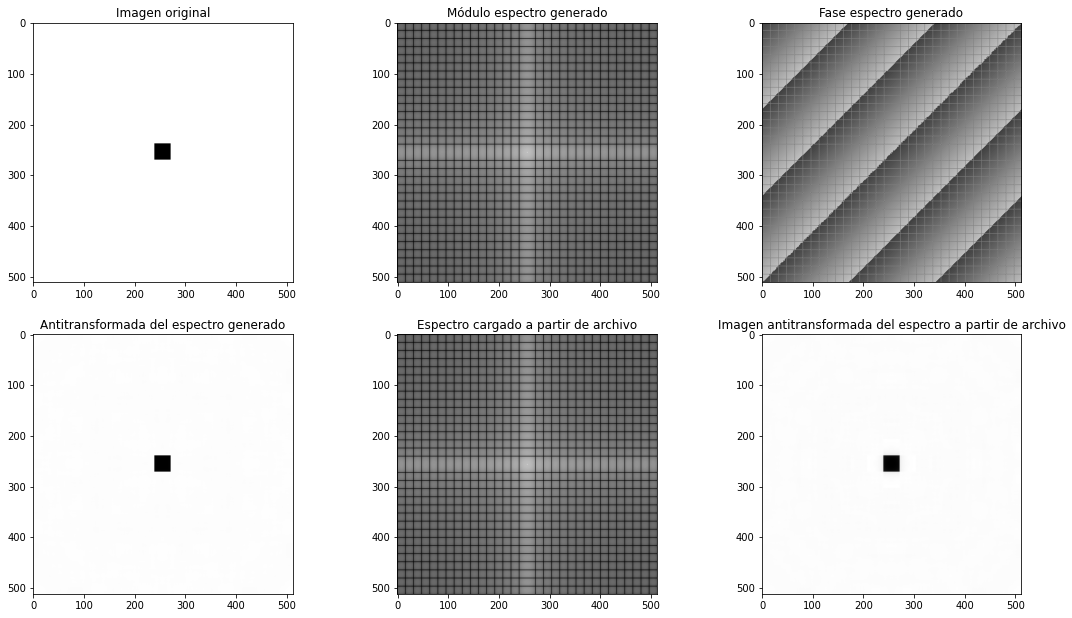

In [ ]:
#@title  { run: "auto", vertical-output: true }
imagen = "cuadrado" #@param ["circulo", "cuadrado", "rectangulo", "octagono", "degrade", "lenna"]
espectro = "espectro.bmp" #@param {type:"string"}
#Obtengo componentes YIQ de la imagen original
if imagen == 'circulo':
    Y, I, Q = RGB2YIQ(imgCirc)
elif imagen == 'cuadrado':
    Y, I, Q = RGB2YIQ(imgCuad)
elif imagen == 'rectangulo':
    Y, I, Q = RGB2YIQ(imgRect)
elif imagen == 'octagono':
    Y, I, Q = RGB2YIQ(imgOct)
elif imagen == 'degrade':
    Y, I, Q = RGB2YIQ(imgDeg)
elif imagen == 'lenna':
    Y, I, Q = RGB2YIQ(imgLenna)

#Transformo la luminancia para obtener su espectro
fft = Transformarfft(Y)


ifft = AntiTransformarfft(fft)

plt.imsave('espectro.bmp',fft,cmap = 'gray')
imgSpec = imageio.imread(espectro)

ifftIMG = AntiTransformarfftIMG(imgSpec)

fig,ax = plt.subplots(2,3)
fig.set_size_inches(18.5, 10.5)
ax[0,0].imshow(Y,'gray')
ax[0,0].set_title('Imagen original')

ax[0,1].imshow(fft, 'gray')
ax[0,1].set_title('Módulo espectro generado')

ax[0,2].imshow(phase,'gray')
ax[0,2].set_title('Fase espectro generado')

ax[1,0].imshow(ifft,'gray')
ax[1,0].set_title('Antitransformada del espectro generado')

ax[1,1].imshow(imgSpec)
ax[1,1].set_title('Espectro cargado a partir de archivo')

ax[1,2].imshow(ifftIMG,'gray')
ax[1,2].set_title('Imagen antitransformada del espectro a partir de archivo')

### Análisis preliminar
Notar que para la mayoria de las imágenes, los resultados son los esperados, sin embargo, para el caso del octágono y lenna, en las mismas se notan ciertas sombras o un blur en la imagen. Esto se debe a que los factores utilizados para realizar el escalamiento no son del todo óptimo para las imágenes mencionadas. En las siguientes subsecciones se realizan el escalamiento óptimo, obteniendo las imágenes deseadas. Cabe mencionar que no se utilizarán las funciones de arriba ya que se variarán los factores utilizados.

## Circulo

Text(0.5, 1.0, 'Antitransformada del espectro a partir de archivo')

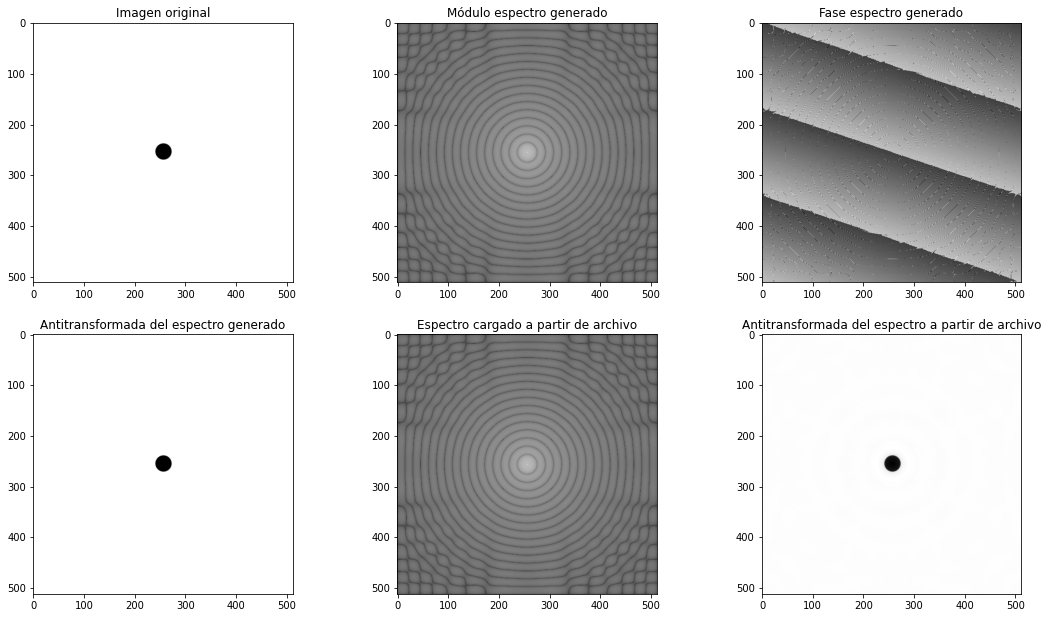

In [ ]:
#Obtengo componentes YIQ de la imagen original
Ycirc, Icirc, Qcirc = RGB2YIQ(imgCirc)

#Transformo la luminancia para obtener su espectro
fftCirc = np.fft.fftshift(np.fft.fft2(Ycirc))

#Separo el espectro en modulo y fase
magCirc = np.abs(fftCirc)
phaseCirc = np.angle(fftCirc)

#Agrego factor y offset para obtener matriz entre 0 y 255
YfftCirc = 26*np.log10(magCirc)+100
YfftCirc = np.clip(YfftCirc,0,255)
YfftCirc2 = YfftCirc.astype('uint8')

#Armo el espectro a partir del modulo y fase obtenidos (no se usa la variable en formato uint8 ya que no permite realizar los escalados)
iMagCirc = np.power(10,(YfftCirc-100)/26)
spectrumCirc = iMagCirc*(np.cos(phaseCirc)+np.sin(phaseCirc)*1j)

#Antitransformo el espectro para obtener la imagen original y obtengo su modulo
iYMagCirc = np.abs(np.fft.ifft2(spectrumCirc))
iYMagCirc = np.clip(iYMagCirc,0,1)

########################## DESCARGA Y CARGA DEL ESPECTRO #####################

#Guardo el espectro a un bitmap para su posterior modificación y carga
plt.imsave('espectroCirc.bmp',YfftCirc2,cmap = 'gray')

#Cargo el espectro guardado
imgSpecCirc = imageio.imread('espectroCirc.bmp')

#Obtengo el canal R del espectro (al ser una imagen en escala de grises, es indistinto el canal utilizdo y el mismo es una representación acorde de la imagen)

YSpecCirc = imgSpecCirc[:,:,0]
YSpecCirc = YSpecCirc.astype('float64')
#Armo el espectro de la inversa para su posterior transformada inversa
YSpecCirc2 = np.power(10,(YSpecCirc-100)/26)

iSpecCirc = YSpecCirc2*(np.cos(phaseCirc)+np.sin(phaseCirc)*1j)

iMagSpecCirc = np.abs(np.fft.ifft2(iSpecCirc))


####################################### GRÁFICOS #############################

fig,ax = plt.subplots(2,3)
fig.set_size_inches(18.5, 10.5)
ax[0,0].imshow(imgCirc)
ax[0,0].set_title('Imagen original')

ax[0,1].imshow(YfftCirc2, 'gray')
ax[0,1].set_title('Módulo espectro generado')

ax[0,2].imshow(phaseCirc,'gray')
ax[0,2].set_title('Fase espectro generado')

ax[1,0].imshow(iYMagCirc,'gray')
ax[1,0].set_title('Antitransformada del espectro generado')

ax[1,1].imshow(imgSpecCirc, 'gray')
ax[1,1].set_title('Espectro cargado a partir de archivo')

ax[1,2].imshow(iMagSpecCirc,'gray')
ax[1,2].set_title('Antitransformada del espectro a partir de archivo')

## Cuadrado

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':


Text(0.5, 1.0, 'Antitransformada del espectro a partir de archivo')

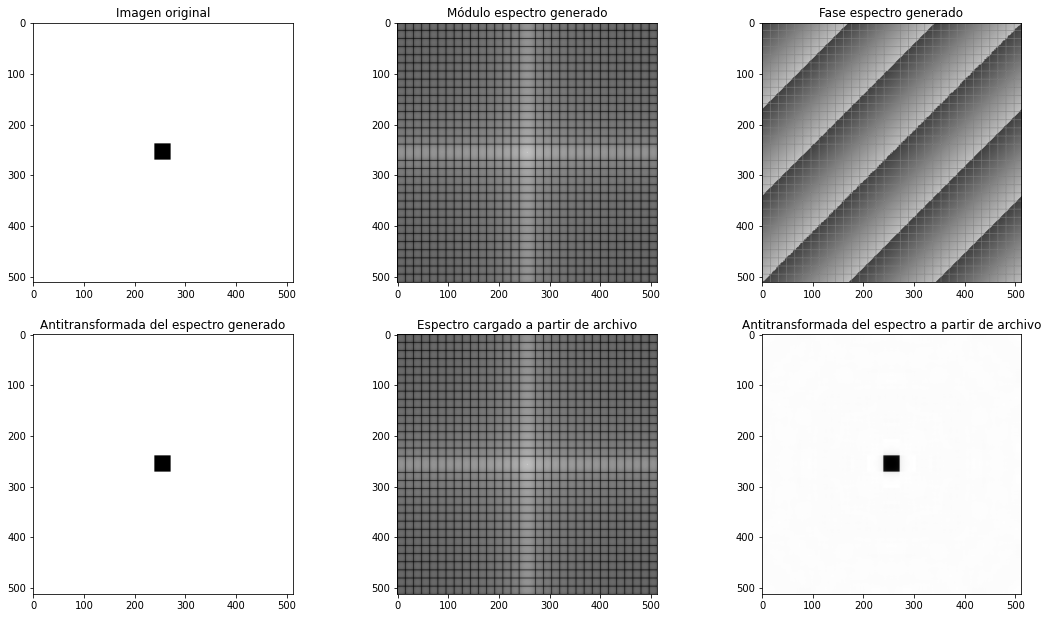

In [ ]:
#Obtengo componentes YIQ de la imagen original
YCuad, ICuad, QCuad = RGB2YIQ(imgCuad)

#Transformo la luminancia para obtener su espectro
fftCuad = np.fft.fftshift(np.fft.fft2(YCuad))

#Separo el espectro en modulo y fase
magCuad = np.abs(fftCuad)
phaseCuad = np.angle(fftCuad)

#Agrego factor y offset para obtener matriz entre 0 y 255
YfftCuad = 26*np.log10(magCuad)+100
YfftCuad = np.clip(YfftCuad,0,255)
YfftCuad2 = YfftCuad.astype('uint8')

#Armo el espectro a partir del modulo y fase obtenidos (no se usa la variable en formato uint8 ya que no permite realizar los escalados)
iMagCuad = np.power(10,(YfftCuad-100)/26)
spectrumCuad = iMagCuad*(np.cos(phaseCuad)+np.sin(phaseCuad)*1j)

#Antitransformo el espectro para obtener la imagen original y obtengo su modulo
iYMagCuad = np.abs(np.fft.ifft2(spectrumCuad))
iYMagCuad = np.clip(iYMagCuad,0,1)

########################## DESCARGA Y CARGA DEL ESPECTRO #####################

#Guardo el espectro a un bitmap para su posterior modificación y carga
plt.imsave('espectroCuad.bmp',YfftCuad2,cmap = 'gray')

#Cargo el espectro guardado
imgSpecCuad = imageio.imread('espectroCuad.bmp')

#Obtengo el canal R del espectro (al ser una imagen en escala de grises, es indistinto el canal utilizdo y el mismo es una representación acorde de la imagen)

YSpecCuad = imgSpecCuad[:,:,0]
YSpecCuad = YSpecCuad.astype('float64')

#Armo el espectro de la inversa para su posterior transformada inversa
YSpecCuad2 = np.power(10,(YSpecCuad-100)/26)

iSpecCuad = YSpecCuad2*(np.cos(phaseCuad)+np.sin(phaseCuad)*1j)

iMagSpecCuad = np.abs(np.fft.ifft2(iSpecCuad))


####################################### GRÁFICOS #############################

fig,ax = plt.subplots(2,3)
fig.set_size_inches(18.5, 10.5)
ax[0,0].imshow(imgCuad)
ax[0,0].set_title('Imagen original')

ax[0,1].imshow(YfftCuad2, 'gray')
ax[0,1].set_title('Módulo espectro generado')

ax[0,2].imshow(phaseCuad,'gray')
ax[0,2].set_title('Fase espectro generado')

ax[1,0].imshow(iYMagCuad,'gray')
ax[1,0].set_title('Antitransformada del espectro generado')

ax[1,1].imshow(imgSpecCuad, 'gray')
ax[1,1].set_title('Espectro cargado a partir de archivo')

ax[1,2].imshow(iMagSpecCuad,'gray')
ax[1,2].set_title('Antitransformada del espectro a partir de archivo')

##Rectángulo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':


Text(0.5, 1.0, 'Antitransformada del espectro a partir de archivo')

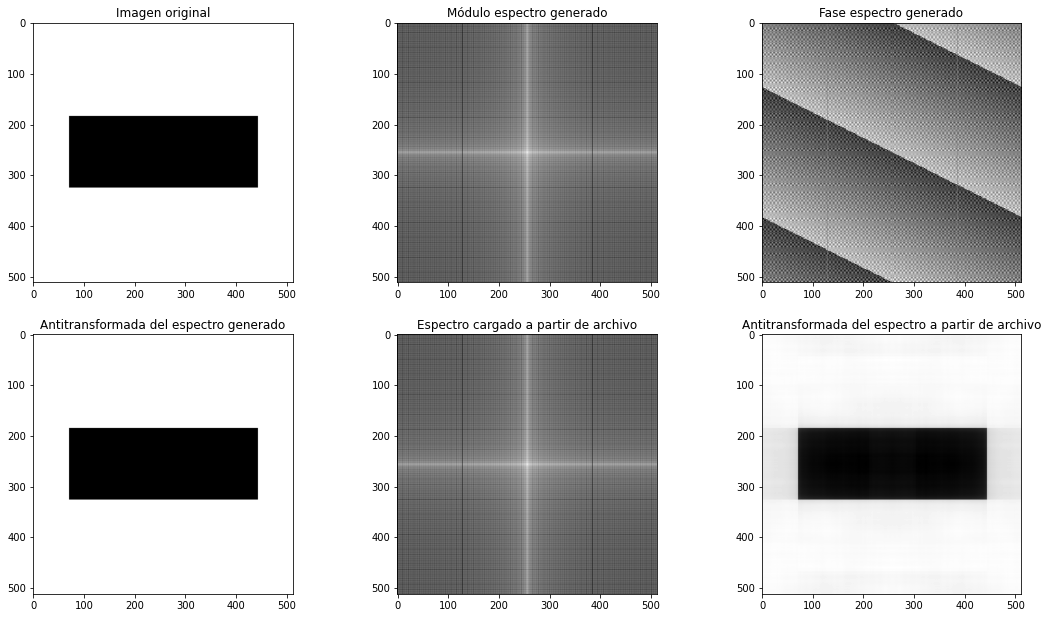

In [ ]:
#Obtengo componentes YIQ de la imagen original
YRect, IRect, QRect = RGB2YIQ(imgRect)

#Transformo la luminancia para obtener su espectro
fftRect = np.fft.fftshift(np.fft.fft2(YRect))

#Separo el espectro en modulo y fase
magRect = np.abs(fftRect)
phaseRect = np.angle(fftRect)

#Agrego factor y offset para obtener matriz entre 0 y 255
YfftRect = 26*np.log10(magRect)+100
YfftRect = np.clip(YfftRect,0,255)
YfftRect2 = YfftRect.astype('uint8')

#Armo el espectro a partir del modulo y fase obtenidos (no se usa la variable en formato uint8 ya que no permite realizar los escalados)
iMagRect = np.power(10,(YfftRect-100)/26)
spectrumRect = iMagRect*(np.cos(phaseRect)+np.sin(phaseRect)*1j)

#Antitransformo el espectro para obtener la imagen original y obtengo su modulo
iYMagRect = np.abs(np.fft.ifft2(spectrumRect))
iYMagRect = np.clip(iYMagRect,0,1)

########################## DESCARGA Y CARGA DEL ESPECTRO #####################

#Guardo el espectro a un bitmap para su posterior modificación y carga
plt.imsave('espectroRect.bmp',YfftRect2,cmap = 'gray')

#Cargo el espectro guardado
imgSpecRect = imageio.imread('espectroRect.bmp')

#Obtengo el canal R del espectro (al ser una imagen en escala de grises, es indistinto el canal utilizdo y el mismo es una representación acorde de la imagen)

YSpecRect = imgSpecRect[:,:,0]
YSpecRect = YSpecRect.astype('float64')

#Armo el espectro de la inversa para su posterior transformada inversa
YSpecRect2 = np.power(10,(YSpecRect-100)/26)

iSpecRect = YSpecRect2*(np.cos(phaseRect)+np.sin(phaseRect)*1j)

iMagSpecRect = np.abs(np.fft.ifft2(iSpecRect))


####################################### GRÁFICOS #############################

fig,ax = plt.subplots(2,3)
fig.set_size_inches(18.5, 10.5)
ax[0,0].imshow(imgRect)
ax[0,0].set_title('Imagen original')

ax[0,1].imshow(YfftRect2, 'gray')
ax[0,1].set_title('Módulo espectro generado')

ax[0,2].imshow(phaseRect,'gray')
ax[0,2].set_title('Fase espectro generado')

ax[1,0].imshow(iYMagRect,'gray')
ax[1,0].set_title('Antitransformada del espectro generado')

ax[1,1].imshow(imgSpecRect, 'gray')
ax[1,1].set_title('Espectro cargado a partir de archivo')

ax[1,2].imshow(iMagSpecRect,'gray')
ax[1,2].set_title('Antitransformada del espectro a partir de archivo')

##Octágono

Text(0.5, 1.0, 'Antitransformada del espectro a partir de archivo')

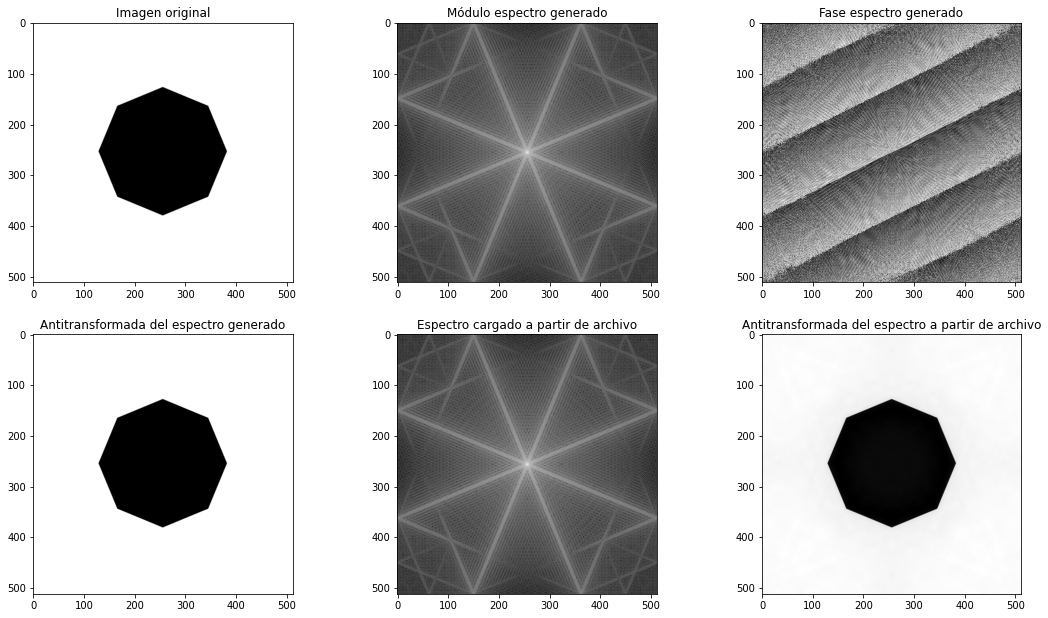

In [ ]:
#Obtengo componentes YIQ de la imagen original
YOct, IOct, QOct = RGB2YIQ(imgOct)

#Transformo la luminancia para obtener su espectro
fftOct = np.fft.fftshift(np.fft.fft2(YOct))

#Separo el espectro en modulo y fase
magOct = np.abs(fftOct)
phaseOct = np.angle(fftOct)

#Agrego factor y offset para obtener matriz entre 0 y 255
YfftOct = 32*np.log10(magOct)+80
YfftOct = np.clip(YfftOct,0,255)
YfftOct2 = YfftOct.astype('uint8')

#Armo el espectro a partir del modulo y fase obtenidos (no se usa la variable en formato uint8 ya que no permite realizar los escalados)
iMagOct = np.power(10,(YfftOct-80)/32)
spectrumOct = iMagOct*(np.cos(phaseOct)+np.sin(phaseOct)*1j)

#Antitransformo el espectro para obtener la imagen original y obtengo su modulo
iYMagOct = np.abs(np.fft.ifft2(spectrumOct))
iYMagOct = np.clip(iYMagOct,0,1)

########################## DESCARGA Y CARGA DEL ESPECTRO #####################

#Guardo el espectro a un bitmap para su posterior modificación y carga
plt.imsave('espectroOct.bmp',YfftOct2,cmap = 'gray')

#Cargo el espectro guardado
imgSpecOct = imageio.imread('espectroOct.bmp')

#Obtengo el canal R del espectro (al ser una imagen en escala de grises, es indistinto el canal utilizdo y el mismo es una representación acorde de la imagen)

YSpecOct = imgSpecOct[:,:,0]
YSpecOct = YSpecOct.astype('float64')

#Armo el espectro de la inversa para su posterior transformada inversa
YSpecOct2 = np.power(10,(YSpecOct-80)/32)

iSpecOct = YSpecOct2*(np.cos(phaseOct)+np.sin(phaseOct)*1j)

iMagSpecOct = np.abs(np.fft.ifft2(iSpecOct))


####################################### GRÁFICOS #############################

fig,ax = plt.subplots(2,3)
fig.set_size_inches(18.5, 10.5)
ax[0,0].imshow(imgOct)
ax[0,0].set_title('Imagen original')

ax[0,1].imshow(YfftOct2, 'gray')
ax[0,1].set_title('Módulo espectro generado')

ax[0,2].imshow(phaseOct,'gray')
ax[0,2].set_title('Fase espectro generado')

ax[1,0].imshow(iYMagOct,'gray')
ax[1,0].set_title('Antitransformada del espectro generado')

ax[1,1].imshow(imgSpecOct, 'gray')
ax[1,1].set_title('Espectro cargado a partir de archivo')

ax[1,2].imshow(iMagSpecOct,'gray')
ax[1,2].set_title('Antitransformada del espectro a partir de archivo')

## Degradado

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':


Text(0.5, 1.0, 'Antitransformada del espectro a partir de archivo')

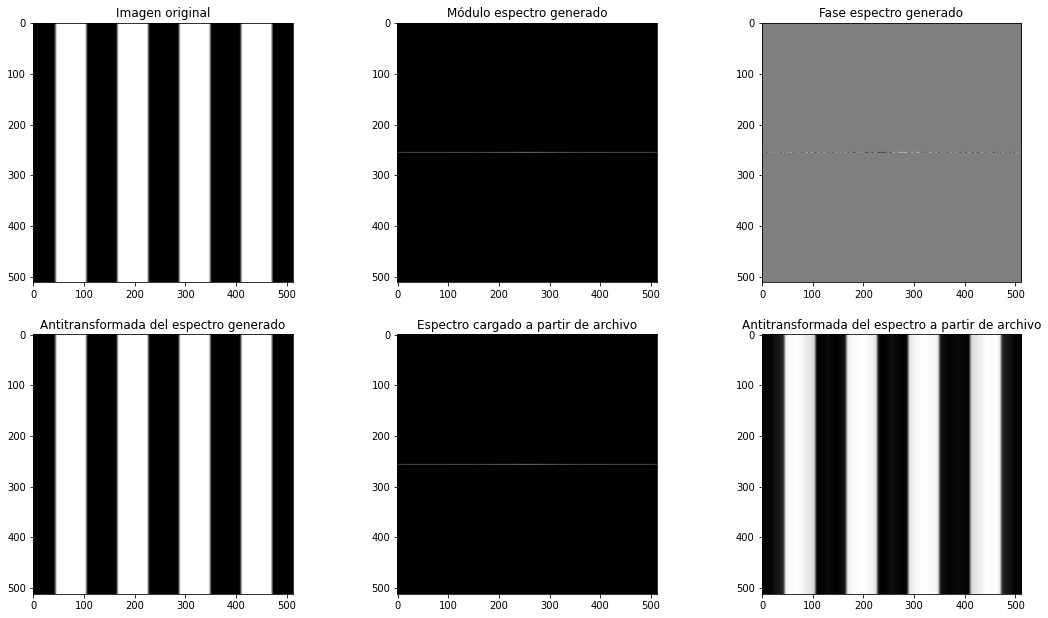

In [ ]:
#Obtengo componentes YIQ de la imagen original
YDeg, IDeg, QDeg = RGB2YIQ(imgDeg)

#Transformo la luminancia para obtener su espectro
fftDeg = np.fft.fftshift(np.fft.fft2(YDeg))

#Separo el espectro en modulo y fase
magDeg = np.abs(fftDeg)
phaseDeg = np.angle(fftDeg)

#Agrego factor y offset para obtener matriz entre 0 y 255
YfftDeg = 26*np.log10(magDeg)+100
YfftDeg = np.clip(YfftDeg,0,255)
YfftDeg2 = YfftDeg.astype('uint8')

#Armo el espectro a partir del modulo y fase obtenidos (no se usa la variable en formato uint8 ya que no permite realizar los escalados)
iMagDeg = np.power(10,(YfftDeg-100)/26)
spectrumDeg = iMagDeg*(np.cos(phaseDeg)+np.sin(phaseDeg)*1j)

#Antitransformo el espectro para obtener la imagen original y obtengo su modulo
iYMagDeg = np.abs(np.fft.ifft2(spectrumDeg))
iYMagDeg = np.clip(iYMagDeg,0,1)

########################## DESCARGA Y CARGA DEL ESPECTRO #####################

#Guardo el espectro a un bitmap para su posterior modificación y carga
plt.imsave('espectroDeg.bmp',YfftDeg2,cmap = 'gray')

#Cargo el espectro guardado
imgSpecDeg = imageio.imread('espectroDeg.bmp')

#Obtengo el canal R del espectro (al ser una imagen en escala de grises, es indistinto el canal utilizdo y el mismo es una representación acorde de la imagen)

YSpecDeg = imgSpecDeg[:,:,0]
YSpecDeg = YSpecDeg.astype('float64')

#Armo el espectro de la inversa para su posterior transformada inversa
YSpecDeg2 = np.power(10,(YSpecDeg-100)/26)

iSpecDeg = YSpecDeg2*(np.cos(phaseDeg)+np.sin(phaseDeg)*1j)

iMagSpecDeg = np.abs(np.fft.ifft2(iSpecDeg))


####################################### GRÁFICOS #############################

fig,ax = plt.subplots(2,3)
fig.set_size_inches(18.5, 10.5)
ax[0,0].imshow(imgDeg)
ax[0,0].set_title('Imagen original')

ax[0,1].imshow(YfftDeg2, 'gray')
ax[0,1].set_title('Módulo espectro generado')

ax[0,2].imshow(phaseDeg,'gray')
ax[0,2].set_title('Fase espectro generado')

ax[1,0].imshow(iYMagDeg,'gray')
ax[1,0].set_title('Antitransformada del espectro generado')

ax[1,1].imshow(imgSpecDeg, 'gray')
ax[1,1].set_title('Espectro cargado a partir de archivo')

ax[1,2].imshow(iMagSpecDeg,'gray')
ax[1,2].set_title('Antitransformada del espectro a partir de archivo')

### Aplicativo para carga de imagenes genéricas. Cargue las imágenes deseadas en el panel de la izquierda. Luego, si desea transformar una imagen, escriba el nombre de la misma en el apartado nameimg y presione transformar imagen. Si desea descargar el espectro, presione el boton y descargue del panel izquierdo el archivo "espectroWanted.bmp". Para cargar el espectro modificado, descargue "espectroWanted.bmp" modifiquelo en paint y subalo nuevamente. Luego, en el apartado namespec del formulario escriba el nombre del espectro modificado y presione el botón antitransformar espectro.

Button(description='Transformar imagen', style=ButtonStyle())

Button(description='Antitransformar espectro', style=ButtonStyle())

Button(description='Descargar espectro', style=ButtonStyle())

Transformada.


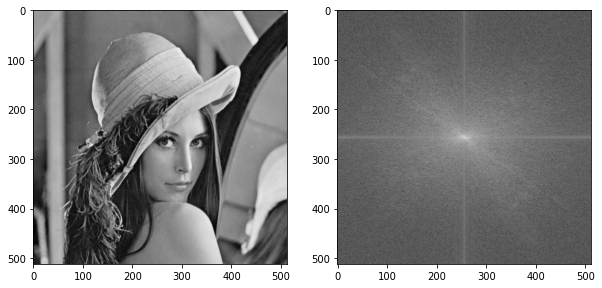

Antitransformada.


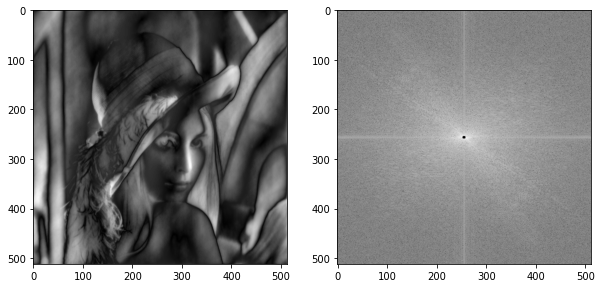

In [ ]:
#@title  { vertical-output: true }
import ipywidgets as widgets
from IPython.display import display

nameimg = "lenna.png" #@param {type:"string"}
namespec = "espectroWanted (1).bmp" #@param {type:"string"}
imgWanted = imageio.imread("/content/"+nameimg)


transformada = widgets.Button(description = "Transformar imagen")
antitransformada = widgets.Button(description = "Antitransformar espectro")
descarga = widgets.Button(description = "Descargar espectro")

def on_transformada_clicked(b):
    # Display the message within the output widget.
    fig,ax = plt.subplots(1,2)
    fig.set_size_inches(10, 5)

    YWanted, IWanted, QWanted = RGB2YIQ(imgWanted)
    ax[0].imshow(YWanted, 'gray')
    global YfftWanted2
    YfftWanted2 = Transformarfft(YWanted)
    ax[1].imshow(YfftWanted2, 'gray')
    print("Transformada.")

def on_antitransformada_clicked(b):
    # Display the message within the output widget.
    fig,ax = plt.subplots(1,2)
    fig.set_size_inches(10, 5)

    imgSpecWanted = imageio.imread("/content/"+namespec)
    ax[1].imshow(imgSpecWanted, 'gray')
    iMagSpecWanted = AntiTransformarfftIMG(imgSpecWanted)
    ax[0].imshow(iMagSpecWanted, 'gray')
    print("Antitransformada.")

def on_descarga_clicked(b):
    plt.imsave('/content/espectroWanted.bmp',YfftWanted2,cmap = 'gray')
    print("Descarga realizada")

transformada.on_click(on_transformada_clicked)
antitransformada.on_click(on_antitransformada_clicked)
descarga.on_click(on_descarga_clicked)
display(transformada,antitransformada,descarga)

# Análisis de resultados
En la primera parte del trabajo, se pudo observar los espectros de distintas formas geométricas. Se observa una relación estrecha entre los ejes "x" e "y" del espectro con la cantidad de oscilaciones de luminancia de la imagen. 

Los factores utilizados para realizar el escalado de la transformada son puramente experimentales, basados en la identidad de parserval. Se logro un factor para el cual la mayoría de las imágenes funciona bien (26*log10(fft)-100), sin embargo, para las imágenes del octágono y el degradado, se debió realizar unas pequeñas modificaciones. El ajuste fino se realizó mediante prueba y error y se llegaron a resultados acordes a los esperados. Se puede notar que para ciertas figuras, el log10 da -infinito ya que el valor es cero, sin embargo esto no resulta en un incoveniente ya que las matrices se clipean.

En un momento del práctico, se experimentó con una serie de problemas que impedían realizar el escalamiento y desescalamiento de manera correcta. Inicialmente se creyó que era un problema la función que provee la fase, pero el problema yacía en que no se estaba trabajando con las matrices en formato float. 

Por último, se pudo implementar una interfaz con botones la cual permite una cierta interactividad con el usuario, sin embargo, debido al estar trabajando en un entorno como colab, la aplicación implementada no presenta todas las funcionalidades y comodidades que se hubiesen podido desarrollar si la aplicación se implementase en otro entorno, lo cual sin dudas hubiese implicado un mayor trabajo también.